# Introduction to Linear and Logistic Regression

### [Brief Intro to Linear Equations](#intro)
### [Linear Regression](#linreg)
- [Simple Linear Regression](#simple)
- [Multiple Linear Regression](#multiple)

### [Logistic Regression](#logreg)

### [Feature Scaling Options](#feature_scaling)

<a class="anchor" id="intro"></a>

## Brief Intro to Linear Equations

The conversion from Celsius to Fahrenheit can be represented by a linear equation, which is similar to the concept of linear regression. In both cases, we use a linear relationship to predict one variable based on another.

The formula to convert Celsius to Fahrenheit is:

$F^\circ = 1.8 \cdot C^\circ + 32$

where:
- $F^\circ$ is the temperature in Fahrenheit.
- $C^\circ$ is the temperature in Celsius.
- $1.8$ is the "slope" (aka the coefficient).
- $32$ is the intercept.


This equation is a linear function, where the Fahrenheit temperature is predicted based on the Celsius temperature. You might remember it as $y = mx + b$

In linear regression, we use a similar linear equation to predict the dependent variable (target) based on the independent variable (feature). The general form of the linear regression equation is:


$\hat{y} = \beta_0 + \beta_1 \cdot x$

where:

- $\hat{y}$ is the predicted value.
- $\beta_0$ is the intercept.
- $\beta_1$ is the coefficient (slope).
- $x$ is the input feature (really, an array of values)

In both cases, we have a linear relationship between the input and the output, and we use coefficients and an intercept to make predictions.

Here is an example code that demonstrates the conversion from Celsius to Fahrenheit and plots the relationship:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to convert Celsius to Fahrenheit
def celsius_to_fahrenheit(celsius):
    return (1.8) * celsius + 32

# Generate Celsius values from 0 to 100
celsius_values = np.arange(0, 101, 1)

# Convert Celsius to Fahrenheit
fahrenheit_values = celsius_to_fahrenheit(celsius_values)

With this equation that we just defined, you can take any value of Celsius and plug it in to the formula to get the value in Fahrenheit!

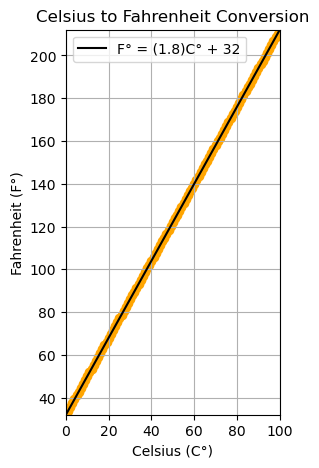

In [3]:
# Plot the conversion
plt.figure(figsize=(4, 5))
plt.plot(celsius_values, fahrenheit_values, label='F° = (1.8)C° + 32', color='black')
plt.scatter(celsius_values, fahrenheit_values, color='orange')
plt.title('Celsius to Fahrenheit Conversion')
plt.xlabel('Celsius (C°)')
plt.ylabel('Fahrenheit (F°)')
plt.legend()
plt.grid(True)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

# Set the limits of the axes to be the same
plt.xlim(0, 100) # temperatures between freezing and boiling point of water :)
plt.ylim(32, 212)

plt.show()

<a class="anchor" id="linreg"></a>

# Linear Regression
## Using Height to Predict Weight

*Note: older versions of sklearn do not include the RMSE metric so you may need to upgrade*
```python
%pip install scikit-learn==1.6.0
```

<a class="anchor" id="simple"></a>

## Simple Linear Regression
We are going to start with simple linear regression, using one variable to predict another. 

In this case, we will use Height to Predict Weight.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

# grab dataset from this url
data = pd.read_csv("https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv")

# display the first few rows of the DataFrame to see what we're working with
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
# # optional save the dataset to a local file
# data.to_csv('data/weight-height.csv', index=False)

In [6]:
data.shape

(10000, 3)

In [7]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [8]:
# at first, we will not use Gender
data['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

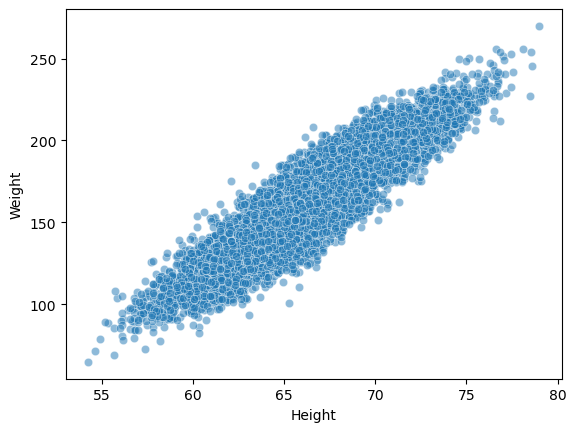

In [9]:
# examine the dataset
# this looks like a great candidate for regression modeling
sns.scatterplot(data, 
                x='Height', 
                y='Weight', 
                alpha=0.5);

In [10]:
# this is the input feature we will use to predict Weight
X = data[['Height']]
X

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [11]:
# this is the target/output that we are trying to predict
y = data[['Weight']]
y

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
9995,136.777454
9996,170.867906
9997,128.475319
9998,163.852461


In [12]:
# split the data into training and test sets
# remember, the test set is the "unseen" data that we will use to evaluate the trained model

# we are going to train on 80% of the data
# and we are going to use the remaining 20% of the data to see how good our trained model is
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# simply verify we performated 80/20 split
print(len(X_train))
print(len(y_train))

percentage_train = len(X_train) / len(X)
print(f"Percentage of data used for training: {percentage_train:.0%}")

8000
8000
Percentage of data used for training: 80%


In [14]:
# simply verify we performated 80/20 split
print(len(X_test))
print(len(y_test))

percentage_train = len(X_test) / len(X)
print(f"Percentage of data used for testing (aka model evaluation): {percentage_train:.0%}")

2000
2000
Percentage of data used for testing (aka model evaluation): 20%


In [15]:
# instantiate the model
# aka load in an untrained model
model = LinearRegression()
model

LinearRegression()

In [16]:
# "fit" the model on the training data
# aka train it

# we don't know if it's any good yet, but we now have a trained regression model!
model.fit(X_train, y_train)
model

LinearRegression()

### Evaluation Metrics

In [17]:
# now that we have the trained model, let's examine what we do with it and how we can evaluate it

# create a dataframe to show the first 5 rows of the test data and predictions on this data
example_data = pd.DataFrame()

example_data['actual_height'] = X_test.head(5)

example_data['actual_weight'] = y_test.head(5)

# use the "fitted" (aka trained) model to predict the weight of the first 5 rows of the test data
example_data['predicted_weight'] = model.predict(X_test.head(5))

example_data

,actual_height,actual_weight,predicted_weight
6252,68.687232,173.115813,179.253990
4684,68.829334,195.162042,180.348483
1731,66.398128,170.217451,161.622888
4742,71.929340,215.049660,204.225307
4521,67.042903,182.721452,166.589062


In [18]:
# before we evaluate the model on the "test" set, let's look at how we calculate the error on the example data

# calculate the error on the example data
# the "error" is the difference between the actual and predicted weight
example_data['error'] = example_data['actual_weight'] - example_data['predicted_weight']

# notice that the error is sometimes positive and sometimes negative?
# we can't simply sum it together, because the positives and negatives will cancel each other out
example_data

,actual_height,actual_weight,predicted_weight,error
6252,68.687232,173.115813,179.253990,-6.138178
4684,68.829334,195.162042,180.348483,14.813559
1731,66.398128,170.217451,161.622888,8.594563
4742,71.929340,215.049660,204.225307,10.824353
4521,67.042903,182.721452,166.589062,16.132390


In [19]:
# RMSE: Root Mean Squared Error

# we have a few options to calculate the average error, 
# in linear regression, RMSE is often my favorite
# because it brings the error back to the same units/scale as the original data

# for our example, we'll calculate the root mean squared error manually
# later we'll use the built-in function from sklearn

# first, square the errors
example_data['squared_error'] = example_data['error'] ** 2

# then calculate the mean of all the squared errors
example_MSE = example_data['squared_error'].mean()

# then take the square root of the mean squared error to bring it back to the same units as the original data
example_RMSE = example_MSE ** 0.5

# this is the RMSE just for our small subset of example data
# generally, you can think of this like the average prediction error
# notice that the "error" we see above is roughly close to this number in magnitude +/-
example_RMSE

11.902990380187992

In [20]:
# before we calculate the RMSE on the test data, let's see what the error is on the training data (80%)
# it can sometimes be a useful comparison to see if the model is overfitting or underfitting the training data
y_train_preds = model.predict(X_train)

training_rmse = root_mean_squared_error(y_train, y_train_preds)
training_rmse

12.221853322979339

In [21]:
# now let's work on the test data (20%) to evalue the model performance
# aka how well does the model predict the weight of people it has never seen before?

y_test_preds = model.predict(X_test) # notice we are using X_test here
y_test_preds

array([[179.25399046],
       [180.34848321],
       [161.62288801],
       ...,
       [129.20288223],
       [166.78470522],
       [101.81227499]])

In [22]:
# remember, these are the actuals
y_test

,Weight
6252,173.115813
4684,195.162042
1731,170.217451
4742,215.049660
4521,182.721452
...,...
6412,142.067438
8285,119.967881
7853,125.179380
1095,187.573494


In [23]:
# evaluate the model
# compare the predicted weights (for the test set) to the actual weights (for the test set)

# this is the average error that the model predicted for each record of the training dataset
# so the averager error for the 20% test set that we held out, is ~12 pounds
# very similar to the training error, which is a good sign that the model is not overfitting or underfitting the training data
test_RMSE = root_mean_squared_error(y_test, y_test_preds)
print(f"Test RMSE: {test_RMSE}")

Test RMSE: 12.206699151878906


In [24]:
# R2 Score: Coefficient of Determination
# let's use one more evaluation metric

# this is KIND OF like saying, what percentage of the time are the predictions correct (compared to the actuals)
# 1.0 is perfect
# 0.0 is terrible
# negative is worse than terrible, but if you get really close to -1.0, you're model is in effect really just upside down


# 0.85 is pretty good!
r2 = r2_score(y_test, y_test_preds)
print(f"R2 Score: {r2}")

R2 Score: 0.85773177770385


In [25]:
# # sometimes it's helpful to visualize the test actuals vs predictions
# # a quick look can never hurt!
# # but don't get confused because it looks similar to our original height and weight plot

# sns.scatterplot(x=y_test['Weight'], 
#                 y=y_test_preds.flatten(), 
#                 alpha=0.5)

# plt.title("Test Set: Actuals vs Predictions")
# plt.xlabel("Actual Weights")
# plt.ylabel("Predicted Weights")
# plt.show();

Before moving on, it's important to understand how the predictions are actually calculated!

Recall from the intro we said that the general form of the linear regression equation is:

$\hat{y} = \beta_0 + \beta_1 \cdot x$

where:

- $\hat{y}$ is the predicted value.
- $\beta_0$ is the intercept.
- $\beta_1$ is the coefficient (slope).
- $x$ is the input feature (really, the array)

In [26]:
# let's manually calculate

# extract the intercept from our trained model
intercept = model.intercept_

# extract the coefficient from our trained model
coefficient = model.coef_[0]


print(f"Intercept: {intercept}")
print(f"Coefficient: {coefficient}")

Intercept: [-349.78782058]
Coefficient: [7.70218561]


In [27]:
# define the linear function to predict weight based on height
# it uses the intercept and coefficient we extracted from the trained model
def predict_weight(height):
    return intercept + coefficient * height

In [28]:
example_data['manual_preds'] = example_data['actual_height'].apply(predict_weight)

# a fun little comparison
# notice the predictions from the sklearn model and the manual predictions are the same!
example_data[['actual_weight', 'predicted_weight', 'manual_preds']]

,actual_weight,predicted_weight,manual_preds
6252,173.115813,179.253990,[179.2539904632422]
4684,195.162042,180.348483,[180.34848320691162]
1731,170.217451,161.622888,[161.622888010432]
4742,215.049660,204.225307,[204.225307254943]
4521,182.721452,166.589062,[166.58906208763153]


<a class="anchor" id="multiple"></a>

## Multiple Linear Regression

Adding Gender to the model to improve our predictive power

In [29]:
# we didn't need this in simple linear regression, but we will need it in multiple linear regression
# explainer later in notebook
from sklearn.preprocessing import StandardScaler

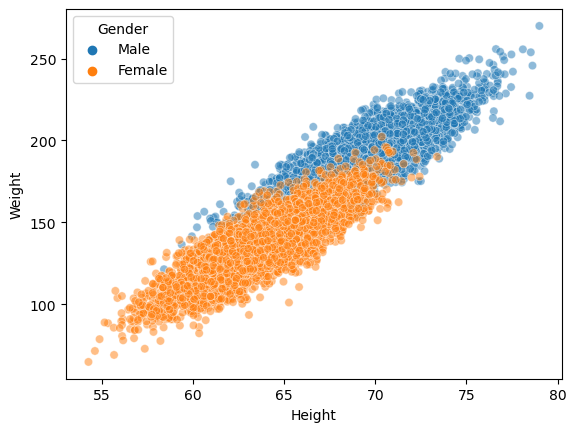

In [30]:
# examine the dataset
# include Gender in the plot

# notice that IN GENERAL, the men are taller and heavier
# we can likely use this to train a more accurate model!

sns.scatterplot(data, 
                x='Height', 
                y='Weight', 
                hue='Gender', 
                alpha=0.5);

In [31]:
# recall that in our data "Gender" is a categorical text variable
# we need to mathematically represent Gender in a way that the model can use
data['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

In [32]:
# let's turn Gender into a numerical representation!
data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# to be clear why we now have only the Gender_Male column instead of Gender for each...
# this is because Gender_Male and Gender_Female are two sides of the same coin...
# we don't want the model to think that these are two separate things and give too much "weight" to Gender

data_encoded['Gender_Male'] = data_encoded['Gender_Male'].astype(int)
data_encoded

# technically we don't NEED to convert to `int` because in Python, True/False is the same as 1/0
# but also to be clear that we are now working with a numerical representation I am including this step

,Height,Weight,Gender_Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
...,...,...,...
9995,66.172652,136.777454,0
9996,67.067155,170.867906,0
9997,63.867992,128.475319,0
9998,69.034243,163.852461,0


In [33]:
# we are still working with the same data, but now we have a numerical representation
# 1/0 instead of Male/Female
data_encoded['Gender_Male'].value_counts()

Gender_Male
1    5000
0    5000
Name: count, dtype: int64

In [34]:
# these are the features we will use to predict weight
# notice that we now have two features, hence, "multiple" linear regression
X = data_encoded[['Height', 'Gender_Male']]
X.head()

,Height,Gender_Male
0,73.847017,1
1,68.781904,1
2,74.110105,1
3,71.730978,1
4,69.881796,1


In [35]:
# this is our target, same as before
y = data_encoded[['Weight']]
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [36]:
# Split the data into training and test sets
# hopefully you trust that it is doing an 80/20 split now :)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standard Scaler

In multiple regression, it is important to ensure that all features contribute equally to the model. Features with larger scales can dominate the learning process, leading to biased results. To address this, we use a technique called **feature scaling**.

One common method of feature scaling is **standardization**, which transforms the features to have a mean of 0 and a standard deviation of 1. 

In [37]:
# Instantiate the scaler
scaler = StandardScaler()

# "Fit" the scaler on the training data 
scaler.fit(X_train)

# and transform both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Note: there is a slightly more convenient alternative. We can *fit* and *transform* the training data in one simple function. It really only saves us a couple lines of code but it's still convenient.

```python
# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train) # the combined step
X_test_scaled = scaler.transform(X_test)
```

In [38]:
# Just like before, instantiate the model
# this will replace the model we previously trained and evaluated
# we now have a new, untrained model
model = LinearRegression()
model

LinearRegression()

In [39]:
# "Fit" (aka train) the model
model.fit(X_train_scaled, y_train) # notice we are using the SCALED data here
model

LinearRegression()

In [40]:
model.intercept_
model.coef_

# notice we have two coefficients now? one for each input feature
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [161.32676231]
Coefficients: [[22.96993149  9.67355818]]


In [41]:
# Make predictions on the test data
y_test_preds = model.predict(X_test_scaled) # notice we are using the SCALED data here

#### Evaluation Metrics

In [42]:
# calculate the Root Mean Squared Error

# did the error go up or down from the simple linear regression model?
# if it went down, then adding Gender helped us train a more accurate model!
test_RMSE = root_mean_squared_error(y_test, y_test_preds)
print(f"RMSE: {test_RMSE}")

RMSE: 10.062021490244046


In [43]:
# and our other evaluation metric
# R2 Score: Coefficient of Determination

# By adding Gender, we improved on our previous simple linear regression model
r2 = r2_score(y_test, y_test_preds)
print(f"R2 Score: {r2}")

R2 Score: 0.9033321846361925


<a class="anchor" id="logreg"></a>

# Logistic Regression
## Using Height and Weight to Predict Gender

Rather than predicting a continuous variable, we are going to train a *classifier* model. We can use the same data as before, Height and Weight, to make a prediction on Gender.

Logistic regression is a statistical method used for *binary* classification. Unlike linear regression, which predicts a continuous value, logistic regression predicts the probability that a given input belongs to a particular class. And we use the probability to determine our prediction.  Here's how it works:

#### The Logistic Function

At the core of logistic regression is the logistic function (also known as the sigmoid function), which maps any real-valued number into the range [0, 1]. The logistic function is defined as:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

where:
- $\sigma(z)$ is the logistic function.
- $z$ is the linear combination of input features and their corresponding coefficients.


#### Calculating the Probability

In logistic regression, the linear combination of input features (height and weight in our case) and their coefficients is passed through the logistic function to calculate the probability that the input belongs to the positive class (e.g., Male). The linear combination is given by:

$$z = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2$$

where:
- $\beta_0$ is the intercept.
- $\beta_1$ and $\beta_2$ are the coefficients for the input features $x_1$ (height) and $x_2$ (weight), respectively.

The probability that the input belongs to the positive class is then calculated as:

$$P(y=1|x) = \sigma(z) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2)}}$$


#### Making the Classification Decision

To make a classification decision, logistic regression uses a threshold (typically 0.5). If the calculated probability is greater than or equal to the threshold, the model predicts the positive class (e.g., Male). Otherwise, it predicts the negative class (e.g., Female). Formally:

$$\hat{y} = 
\begin{cases} 
1 & \text{if } P(y=1|x) \geq 0.5 \\
0 & \text{if } P(y=1|x) < 0.5 
\end{cases}$$

Or more simply put, if the predicted probability is greater than 50%, the model chooses that class because it is the more likely actual.

Let's consider our example where we use height and weight to predict gender. The logistic regression model will calculate the probability that a given height and weight corresponds to a Male. If this probability is 0.7, the model will classify the input as Male (since 0.7 > 0.5). If the probability is 0.3, the model will classify the input as Female (since 0.3 < 0.5).

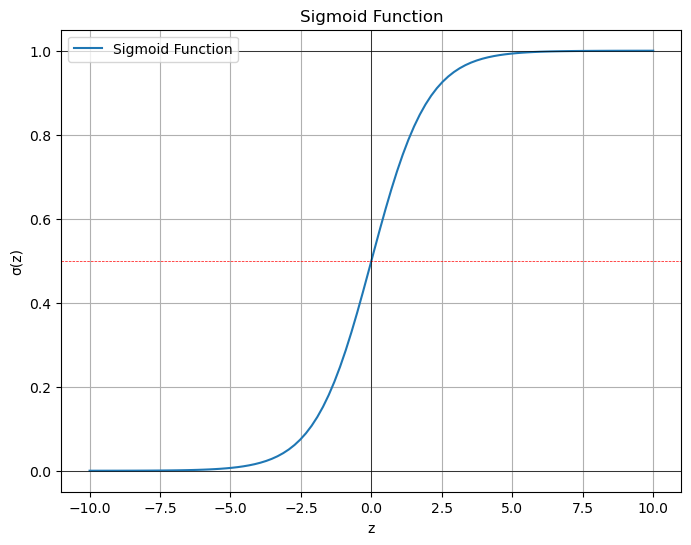

In [44]:
# don't worry about the code here
# the key takeaway is understanding this is what the sigmoid function looks like
# and that it is used in logistic regression

# so if the output of the sigmoid function is greater than 0.5 (above the red line), we predict 1
# if the output of the sigmoid function is less than 0.5 (below the red line), we predict 0 

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for z
z = np.linspace(-10, 10, 100)

# Calculate the sigmoid values for each z
sigmoid_values = sigmoid(z)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid_values, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axhline(0.5, color='red', linestyle='--', linewidth=0.5)
plt.axhline(1, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# grad dataset from this url
data = pd.read_csv("https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv")

# Display the first few rows of the DataFrame
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


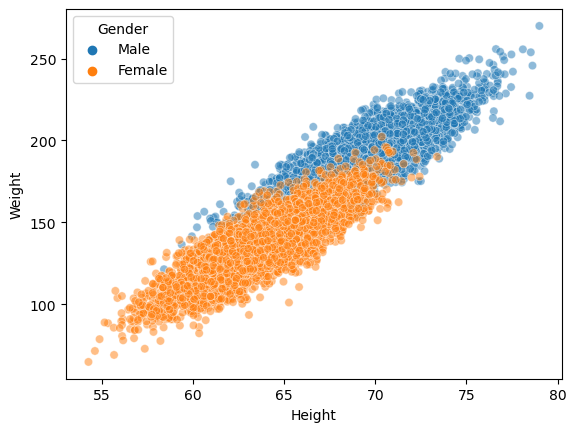

In [46]:
# examine the dataset
# include Gender in the plot
# same date we worked with before
sns.scatterplot(data, 
                x='Height', 
                y='Weight', 
                hue='Gender', 
                alpha=0.5);

In [47]:
# Encode the 'Gender' column into a numerical representation
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [48]:
# input features
X = data[['Height', 'Weight']]

# Target variable
y = data['Gender']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# Instantiate the logistic regression model
model = LogisticRegression()
model

LogisticRegression()

In [50]:
# Fit the model
model.fit(X_train_scaled, y_train)
model

LogisticRegression()

#### Evalation Metrics
For a classification model, we can't use RMSE or R2 Score, because we aren't predicting a continuous value.

Instead, we use (among others)...

- Accuracy: overall proportion that are correctly classified
- Precision: proportion of *positively <u>classified</u>* that are actually correct
- Recall: proportion of *actual positives* that are correctly classified (aka the "true positive rate")
- F1 Score: the harmonic mean between Precision and Recall

In [51]:
# Make predictions on the test data
y_test_preds = model.predict(X_test_scaled)
y_test_preds

array([1, 1, 1, ..., 0, 1, 0])

In [52]:
# Evaluate the model on the test data
# closer to 1 is better for all of these metrics

# we achieved pretty good scores across all of these metrics

accuracy = accuracy_score(y_test, y_test_preds)
precision = precision_score(y_test, y_test_preds)
recall = recall_score(y_test, y_test_preds)
f1 = f1_score(y_test, y_test_preds)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9245
Precision: 0.9167473378509197
Recall: 0.9357707509881423
F1 Score: 0.9261613691931541


In [53]:
# the confusion matrix is a great way to visualize the performance of a classification model
# it shows the number of True Positives, False Positives, True Negatives, and False Negatives
# which helps us understand where the model is making mistakes
conf_matrix = confusion_matrix(y_test, y_test_preds)
conf_matrix

array([[902,  86],
       [ 65, 947]])

To view colormap options that sklearn confusion matrix accepts, double click this cell

<!--
colormaps = [
    'Accent',
    'Accent_r',
    'Blues',
    'Blues_r',
    'BrBG',
    'BrBG_r',
    'BuGn',
    'BuGn_r',
    'BuPu',
    'BuPu_r',
    'CMRmap',
    'CMRmap_r',
    'Dark2',
    'Dark2_r',
    'GnBu',
    'GnBu_r',
    'Grays',
    'Greens',
    'Greens_r',
    'Greys',
    'Greys_r',
    'OrRd',
    'OrRd_r',
    'Oranges',
    'Oranges_r',
    'PRGn',
    'PRGn_r',
    'Paired',
    'Paired_r',
    'Pastel1',
    'Pastel1_r',
    'Pastel2',
    'Pastel2_r',
    'PiYG',
    'PiYG_r',
    'PuBu',
    'PuBuGn',
    'PuBuGn_r',
    'PuBu_r',
    'PuOr',
    'PuOr_r',
    'PuRd',
    'PuRd_r',
    'Purples',
    'Purples_r',
    'RdBu',
    'RdBu_r',
    'RdGy',
    'RdGy_r',
    'RdPu',
    'RdPu_r',
    'RdYlBu',
    'RdYlBu_r',
    'RdYlGn',
    'RdYlGn_r',
    'Reds',
    'Reds_r',
    'Set1',
    'Set1_r',
    'Set2',
    'Set2_r',
    'Set3',
    'Set3_r',
    'Spectral',
    'Spectral_r',
    'Wistia',
    'Wistia_r',
    'YlGn',
    'YlGnBu',
    'YlGnBu_r',
    'YlGn_r',
    'YlOrBr',
    'YlOrBr_r',
    'YlOrRd',
    'YlOrRd_r',
    'afmhot',
    'afmhot_r',
    'autumn',
    'autumn_r',
    'binary',
    'binary_r',
    'bone',
    'bone_r',
    'brg',
    'brg_r',
    'bwr',
    'bwr_r',
    'cividis',
    'cividis_r',
    'cool',
    'cool_r',
    'coolwarm',
    'coolwarm_r',
    'copper',
    'copper_r',
    'crest',
    'crest_r',
    'cubehelix',
    'cubehelix_r',
    'flag',
    'flag_r',
    'flare',
    'flare_r',
    'gist_earth',
    'gist_earth_r',
    'gist_gray',
    'gist_gray_r',
    'gist_grey',
    'gist_heat',
    'gist_heat_r',
    'gist_ncar',
    'gist_ncar_r',
    'gist_rainbow',
    'gist_rainbow_r',
    'gist_stern',
    'gist_stern_r',
    'gist_yarg',
    'gist_yarg_r',
    'gist_yerg',
    'gnuplot',
    'gnuplot2',
    'gnuplot2_r',
    'gnuplot_r',
    'gray',
    'gray_r',
    'grey',
    'hot',
    'hot_r',
    'hsv',
    'hsv_r',
    'icefire',
    'icefire_r',
    'inferno',
    'inferno_r',
    'jet',
    'jet_r',
    'magma',
    'magma_r',
    'mako',
    'mako_r',
    'nipy_spectral',
    'nipy_spectral_r',
    'ocean',
    'ocean_r',
    'pink',
    'pink_r',
    'plasma',
    'plasma_r',
    'prism',
    'prism_r',
    'rainbow',
    'rainbow_r',
    'rocket',
    'rocket_r',
    'seismic',
    'seismic_r',
    'spring',
    'spring_r',
    'summer',
    'summer_r',
    'tab10',
    'tab10_r',
    'tab20',
    'tab20_r',
    'tab20b',
    'tab20b_r',
    'tab20c',
    'tab20c_r',
    'terrain',
    'terrain_r',
    'turbo',
    'turbo_r',
    'twilight',
    'twilight_r',
    'twilight_shifted',
    'twilight_shifted_r',
    'viridis',
    'viridis_r',
    'vlag',
    'vlag_r',
    'winter',
    'winter_r'
]
-->

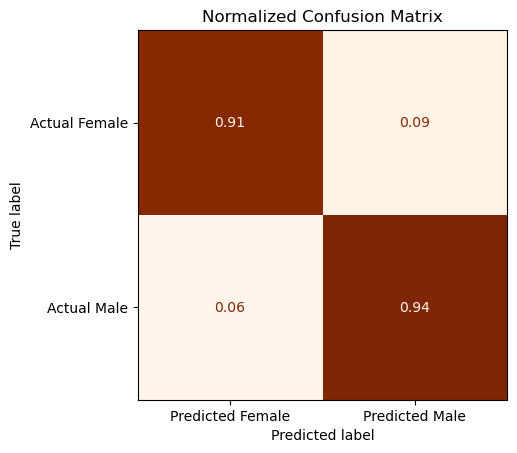

In [54]:
# Calculate the normalized confusion matrix (so we can see percentages instead of counts)
# aka the percentage of correct/incorrect predictions for each class
conf_matrix = confusion_matrix(y_test, y_test_preds, normalize='true')

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Female', 'Male'])

# Plot the confusion matrix
disp.plot(cmap='Oranges', values_format='.2f')
plt.title('Normalized Confusion Matrix')

# remove color bar
disp.im_.colorbar.remove()

# Customize the axis labels
plt.gca().set_xticklabels(['Predicted Female', 'Predicted Male'])
plt.gca().set_yticklabels(['Actual Female', 'Actual Male'])

plt.show()

You can see that the model performed slightly better on Males than Females, but generally the predictions are pretty balanced between the genders.

#### Predicted Probabilities and Manual Calculation

Before moving on, it's useful to see what's going on under the hood. 

Let's look at the probabilties that the model predicts for the first 3 records in the test set.

Then we'll manually calculate using the logistic regression formula and our fitted model parameters.

In [55]:
# Get the first three records from the test set
X_test_sample = X_test_scaled[:3]


# the output for each is two probabilities, one for each class (0 / 1) 
model_probas = model.predict_proba(X_test_sample)
model_probas

array([[0.23676971, 0.76323029],
       [0.00498261, 0.99501739],
       [0.15560052, 0.84439948]])

In [56]:
# you can see that the model is predicting Male (1) for all three records
# because the probability of each is greater than 0.5 as shown above
model_preds = model.predict(X_test_sample)
model_preds

array([1, 1, 1])

In [57]:
# Extract the model coefficients and intercept from the trained model
intercept = model.intercept_[0]
coefficients = model.coef_[0]

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}") # one for each feature, Height and Weight

Intercept: 0.018454314191852735
Coefficients: [-1.80103734  6.09385897]


In [58]:
# Define the sigmoid function
# this converts the output of the linear combination of the input features into a probability
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Manually calculate the probabilities
probabilities = [] # instantiate an empty list to store the probabilities

for record in X_test_sample:
    z = intercept + np.dot(coefficients, record) # intercept and coefficients are from the trained model
    prob = sigmoid(z) # squeeze the output to be between 0 and 1 using the sigmoid function
    probabilities.append(prob)

# Convert to numpy array for better display
probabilities = np.array(probabilities)

# Print the manually calculated probabilities
print("Manually calculated probabilities:")
for proba in probabilities:
    print(proba)

# Compare with model's predict_proba output
print("\nModel's output for the first three records:")
print(model_probas)


print("\ndo these look similar to you? :)")

Manually calculated probabilities:
0.7632302947365737
0.9950173922917045
0.8443994816143998

Model's output for the first three records:
[[0.23676971 0.76323029]
 [0.00498261 0.99501739]
 [0.15560052 0.84439948]]

do these look similar to you? :)


<a class="anchor" id="feature_scaling"></a>

# Feature Scaling Options

In machine learning, feature scaling is a crucial preprocessing step that ensures all features contribute equally to the model. Different scaling techniques can be used depending on the nature of the data and the specific requirements of the model. Here are three common scaling options:

In our Multiple Linear Regression session, we used the `StandardScaler`.

#### 1. Standard Scaler

**Description**:
The Standard Scaler standardizes features by removing the mean and scaling to unit variance. This means that each feature will have a mean of 0 and a standard deviation of 1.

**When to Use**:
- When the data follows a Gaussian (normal) distribution.
- When you want to ensure that all features contribute equally to the model.

**Code Example**:
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

#### Robust Scaler

**Description**:
The Robust Scaler scales features using statistics that are robust to outliers. It removes the median and scales the data according to the interquartile range (IQR).

**When to Use**:
- When the data contains outliers that could skew the mean and standard deviation.
- When you want to minimize the influence of outliers on the scaling process.

**Code Example**:
```python
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

#### Max Absolute Scaler

**Description**:
The Max Absolute Scaler scales each feature by its maximum absolute value. This ensures that all features are in the range [-1, 1].

**When to Use**:
- When the data is sparse (contains many zeros).
- When you want to preserve the sparsity of the data.

**Code Example**:
```python
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```